<a href="https://colab.research.google.com/github/Nyawira12/House-Prices-Prediction/blob/master/Nyawira_Kibathi_Week_7_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICES PREDICTIONS**

## **Defining the Question**

### a) Specifying the Question


> As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.



### b) Metrics for Success

- Design a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 
- Find a model with the best Accuracy Root Mean Squared Error and Mean Squared Error scores. 
-  Accurate identification of relevant features for the analysis. 

### c) Understanding the context 

The analysis is relevant for the Hass Consulting company which operates in the real estate industry which calls for accurate prediction of house prices. The following is the a list of variables that may influence house prices:

- bedrooms - Number of Bedrooms
- bathrooms - Number of Bathrooms
- sqft_living - Square feet area of living area
- sqft_lot  - Square feet area of parking Layout
- floors - Number of Floors
- waterfront - Whether waterfront is there or not
- view - Number of Views
- grade - Grades
- sqft_above
- sqft_basement - Square feet area off basement
- yr_built - Year the house is built
- yr_renovated - Year the house is renovated
- zipcode - zipcode os the house
- lat : Latitude of the house
- lon : Longitude of the house
- sqft_living15
- sqft_lot15

### d) Recording the Experimental Design

The process followed in this analysis includes:

- Import libraries and load datasets. 
- Check and clean data. 
- Exploratory Data Analysis. 
- Model Testing. 
- Implementing the solution. 

### e) Data Relevance

The data used was relevant for the analysis, there is a wide enough range of variables to provide preliminary analysis for modelling. 

## **Importing Libraries and Reading the Data**

In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
House_df = pd.read_csv("/content/Independent Project Week 7 - house_data (1).csv", sep=',')
House_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
House_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [13]:
House_df.shape

(21613, 20)

In [14]:
House_df.nunique ()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [15]:
House_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
House_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [17]:
House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [18]:
House_df.duplicated().sum()

3

# **Tidying the Dataset**

In [19]:
House_df.drop('id', axis=1, inplace=True)

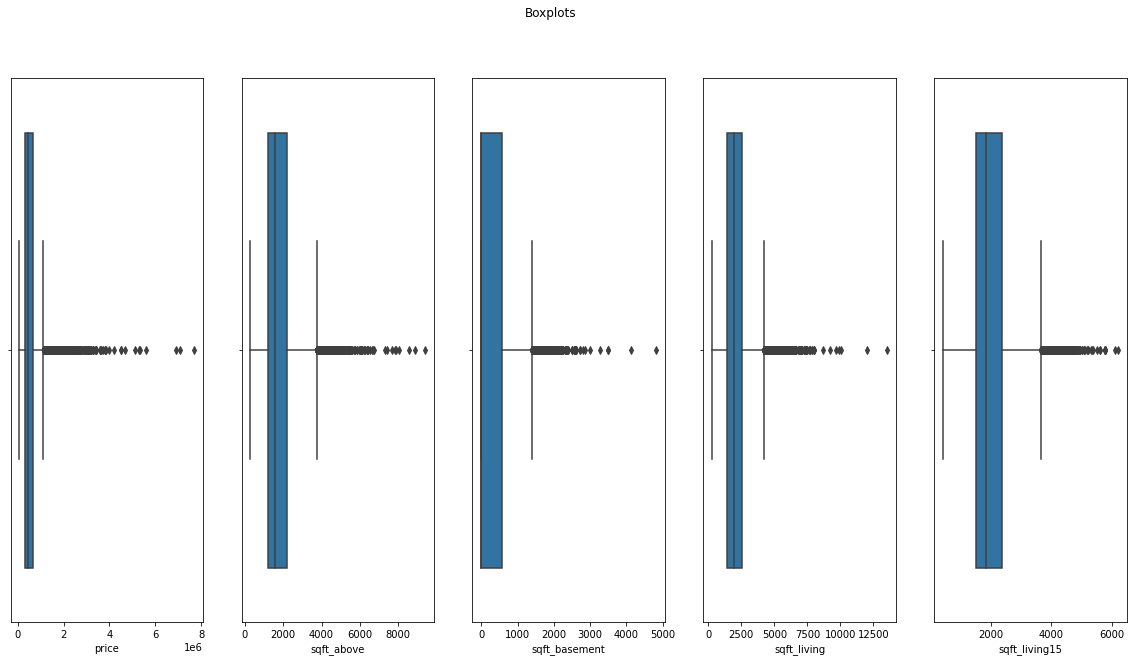

In [20]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1,5, figsize=(20, 10))
fig.suptitle("Boxplots")
sns.boxplot(House_df['price'], ax=ax1)
sns.boxplot(House_df['sqft_above'], ax=ax2)
sns.boxplot(House_df['sqft_basement'], ax=ax3)
sns.boxplot(House_df['sqft_living'], ax=ax4)
sns.boxplot(House_df['sqft_living15'], ax=ax5)
plt.show()

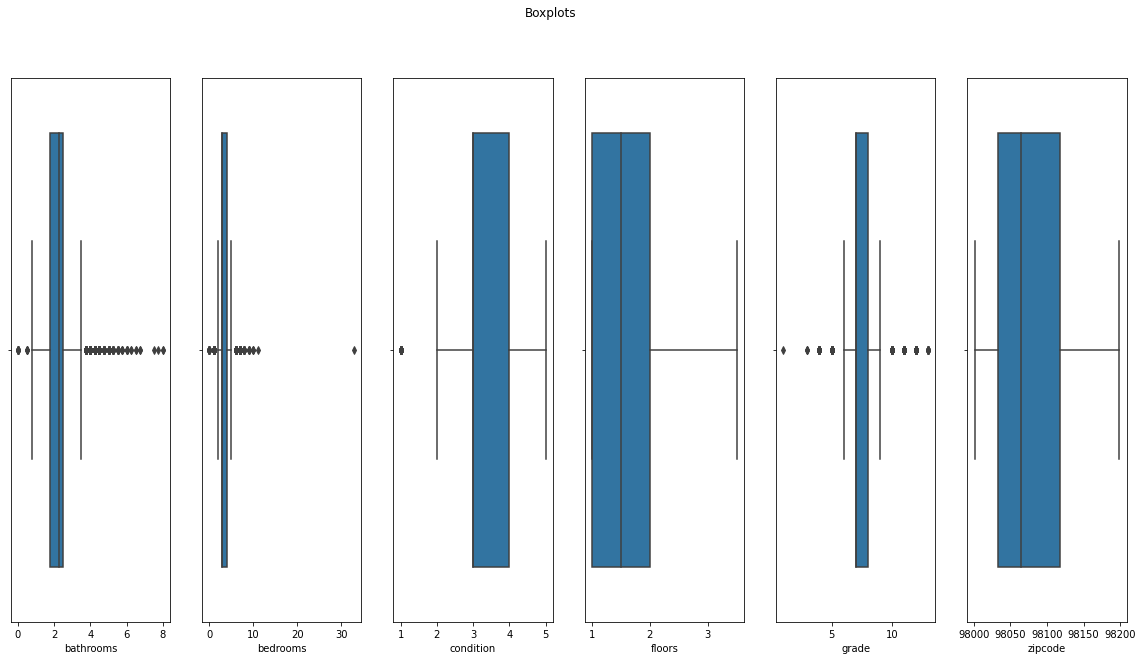

In [21]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(1,6, figsize=(20, 10))
fig.suptitle("Boxplots")
sns.boxplot(House_df['bathrooms'], ax=ax1)
sns.boxplot(House_df['bedrooms'], ax=ax2)
sns.boxplot(House_df['condition'], ax=ax3)
sns.boxplot(House_df['floors'], ax=ax4)
sns.boxplot(House_df['grade'], ax=ax5)
sns.boxplot(House_df['zipcode'], ax=ax6)
plt.show()

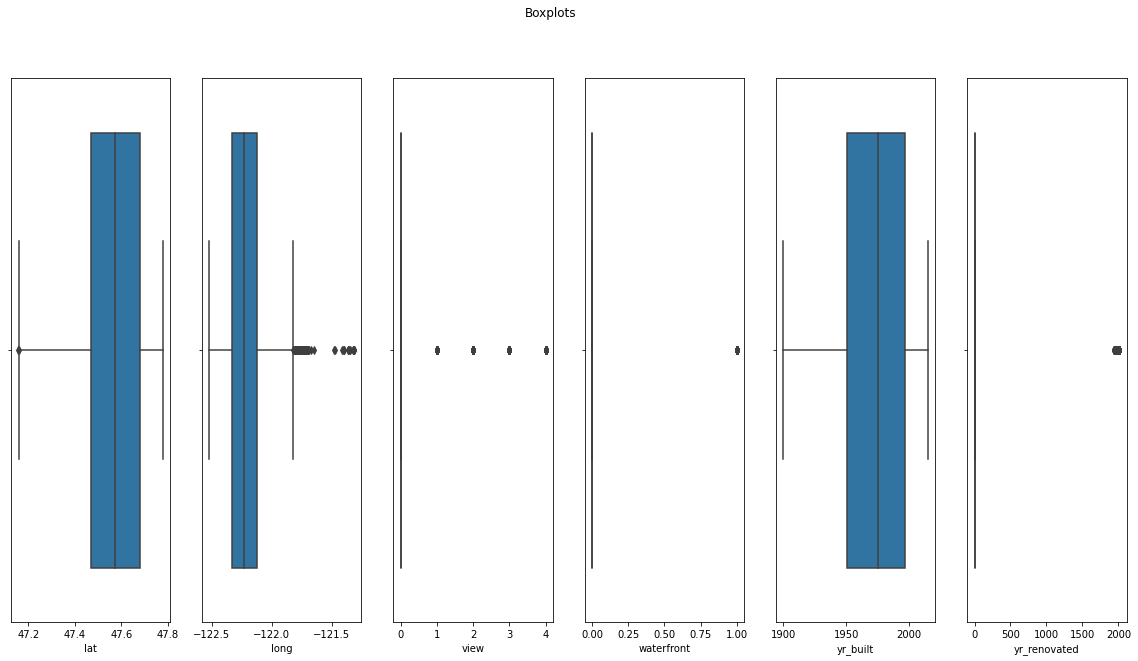

In [22]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(1,6, figsize=(20, 10))
fig.suptitle("Boxplots")
sns.boxplot(House_df['lat'], ax=ax1)
sns.boxplot(House_df['long'], ax=ax2)
sns.boxplot(House_df['view'], ax=ax3)
sns.boxplot(House_df['waterfront'], ax=ax4)
sns.boxplot(House_df['yr_built'], ax=ax5)
sns.boxplot(House_df['yr_renovated'], ax=ax6)

In [23]:
House_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The dataset displays a significant number of outliers which would make dropping them affect the results of analysis. We shall deal with outliers in the case where extreme values affect the design of the model. 

# **Exploratory Analysis**

# a) Univariate Analysis

In [24]:
House_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [25]:
columns = ['price', 'bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot','waterfront','floors', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 


for col in columns:
  print('\n')
  print(col +':' + str(House_df[col].mode()))



price:0    350000.0
1    450000.0
dtype: float64


bathrooms:0    2.5
dtype: float64


bedrooms:0    3
dtype: int64


sqft_living:0    1300
dtype: int64


sqft_lot:0    5000
dtype: int64


waterfront:0    0
dtype: int64


floors:0    1.0
dtype: float64


view:0    0
dtype: int64


condition:0    3
dtype: int64


grade:0    7
dtype: int64


sqft_above:0    1300
dtype: int64


sqft_basement:0    0
dtype: int64


yr_built:0    2014
dtype: int64


yr_renovated:0    0
dtype: int64


zipcode:0    98103
dtype: int64


lat:0    47.5322
1    47.5491
2    47.6624
3    47.6846
dtype: float64


long:0   -122.29
dtype: float64


sqft_living15:0    1540
dtype: int64


sqft_lot15:0    5000
dtype: int64


In [26]:
columns = ['price', 'bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot','waterfront','floors', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 


for col in columns:
  print('\n')
  print('The skewness is:', col + str(House_df[col].skew()))



The skewness is: price4.021715573048684


The skewness is: bathrooms0.5111075733474171


The skewness is: bedrooms1.97429953543601


The skewness is: sqft_living1.471555426802092


The skewness is: sqft_lot13.060018959031755


The skewness is: waterfront11.385107942339081


The skewness is: floors0.616176721157611


The skewness is: view3.395749593248714


The skewness is: condition1.0328046374434587


The skewness is: grade0.7711032007576067


The skewness is: sqft_above1.4466644733818372


The skewness is: sqft_basement1.5779650555996247


The skewness is: yr_built-0.46980539881436767


The skewness is: yr_renovated4.549493366993928


The skewness is: zipcode0.4056612082396646


The skewness is: lat-0.4852704765380861


The skewness is: long0.8850529834328087


The skewness is: sqft_living151.1081812758966967


The skewness is: sqft_lot159.506743246764398


In [27]:
columns = ['price', 'bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot','waterfront','floors', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 


for col in columns:
  print('\n')
  print('The variance is:', col + str(House_df[col].var()))



The variance is: price134955009292.83669


The variance is: bathrooms0.5931512887355798


The variance is: bedrooms0.8650150097573724


The variance is: sqft_living843533.6813681519


The variance is: sqft_lot1715658774.1754541


The variance is: waterfront0.007485225502689098


The variance is: floors0.29158800687709074


The variance is: view0.5872426169774596


The variance is: condition0.42346651239404876


The variance is: grade1.3817032893475767


The variance is: sqft_above685734.6672685045


The variance is: sqft_basement195872.66840094145


The variance is: yr_built862.7972621659717


The variance is: yr_renovated161346.2118623043


The variance is: zipcode2862.7878348129493


The variance is: lat0.01919990179600804


The variance is: long0.019832622017890645


The variance is: sqft_living15469761.23994532274


The variance is: sqft_lot15745518225.3404043


In [28]:
columns = ['price', 'bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot','waterfront','floors', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 


for col in columns:
  print('\n')
  print('The kurtosis is:', col + str(House_df[col].kurt()))



The kurtosis is: price34.522444410072566


The kurtosis is: bathrooms1.2799024441754554


The kurtosis is: bedrooms49.06365318170099


The kurtosis is: sqft_living5.24309298981711


The kurtosis is: sqft_lot285.0778196973658


The kurtosis is: waterfront127.63249356537696


The kurtosis is: floors-0.4847229368298285


The kurtosis is: view10.893021684601504


The kurtosis is: condition0.5257635652845423


The kurtosis is: grade1.1909320773987657


The kurtosis is: sqft_above3.40230362139787


The kurtosis is: sqft_basement2.7155742114129353


The kurtosis is: yr_built-0.657407504733527


The kurtosis is: yr_renovated18.701152117599058


The kurtosis is: zipcode-0.8534788732101246


The kurtosis is: lat-0.6763130016065335


The kurtosis is: long1.0495008872914617


The kurtosis is: sqft_living151.5970958104616884


The kurtosis is: sqft_lot15150.76311004626973


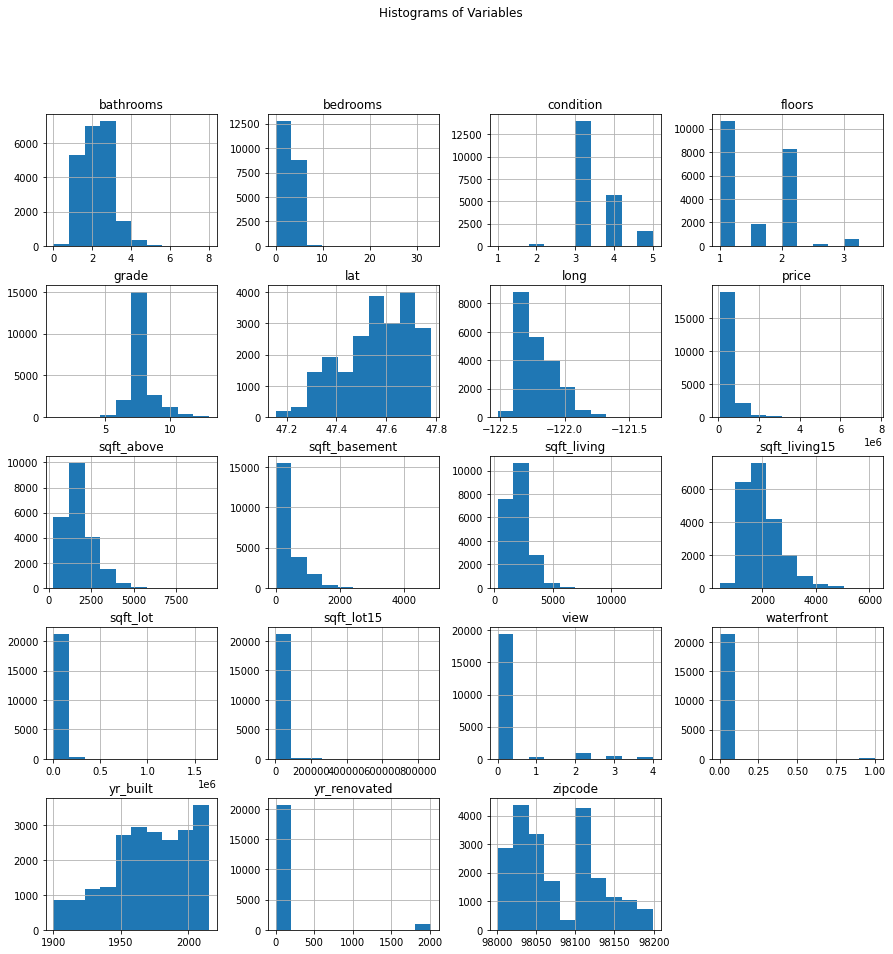

In [29]:
House_df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histograms of Variables")
plt.show()

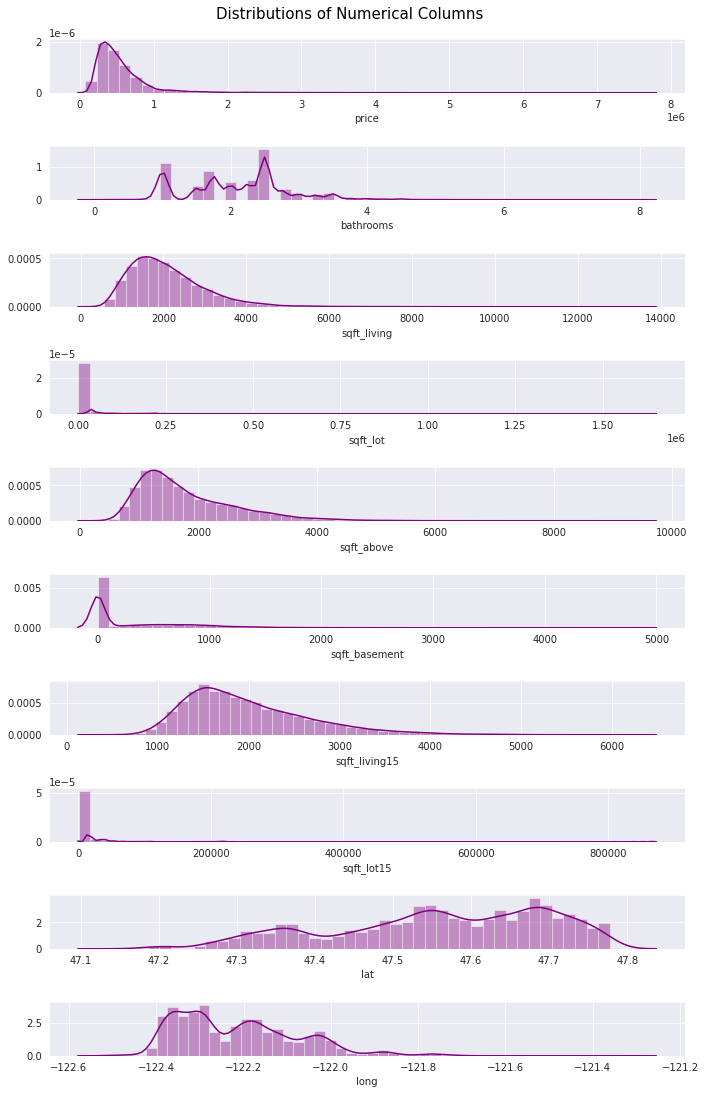

In [30]:
num_columns = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
                'sqft_basement','sqft_living15', 'sqft_lot15', 'lat', 'long']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(num_columns), figsize = (10, 15))
fig.suptitle('Distributions of Numerical Columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), House_df, num_columns):
  sns.distplot(House_df[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

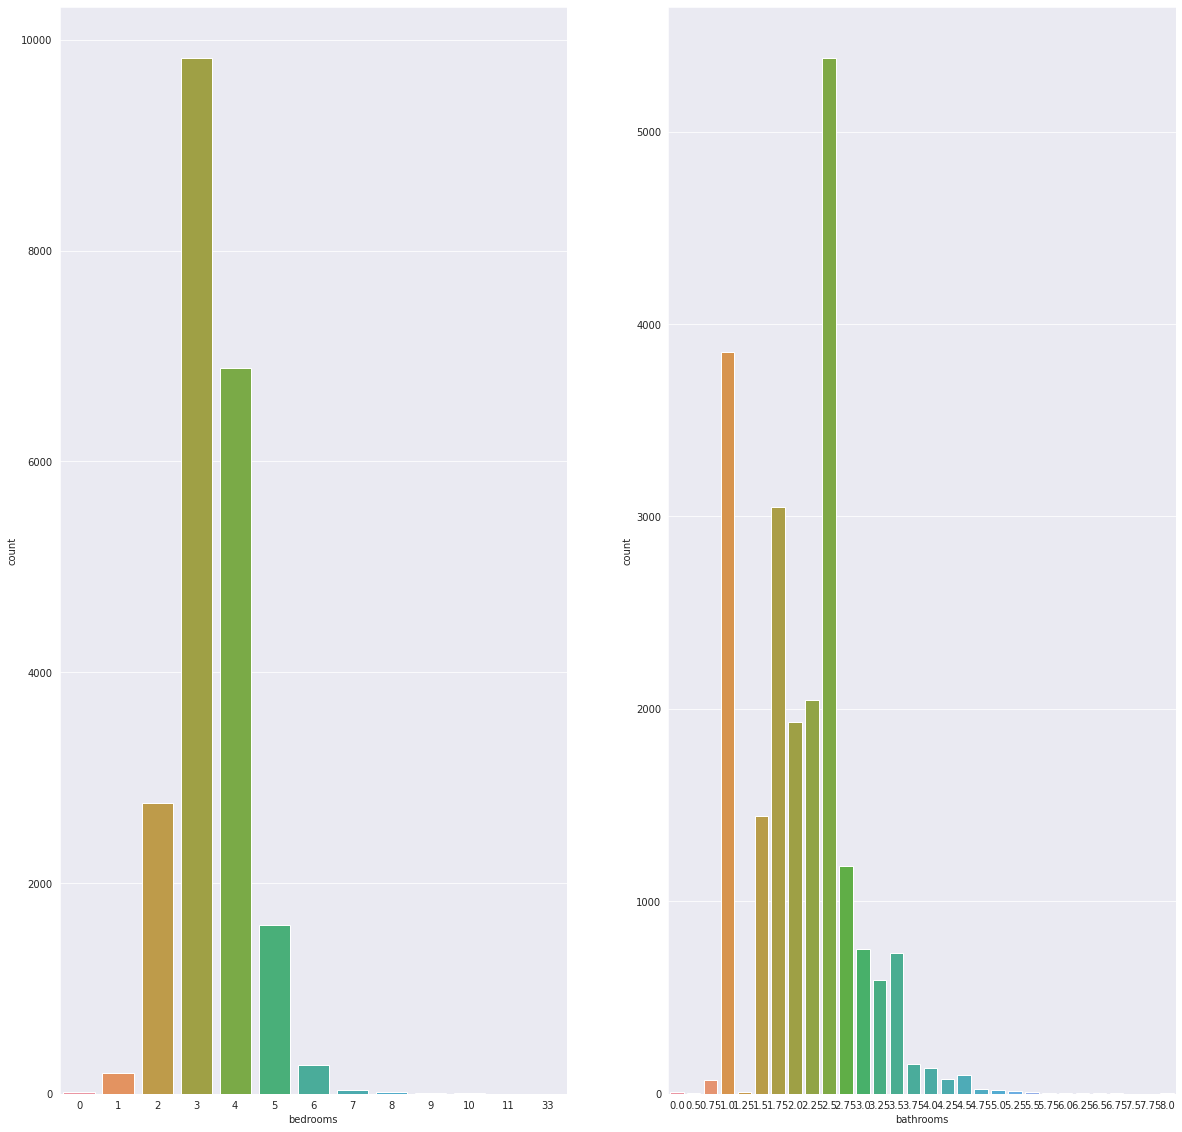

In [31]:
fig, ax = plt.subplots(1,2, figsize=(20, 20))
sns.countplot(House_df['bedrooms'], ax=ax[0])
sns.countplot(House_df['bathrooms'], ax=ax[1])
fig.show() 

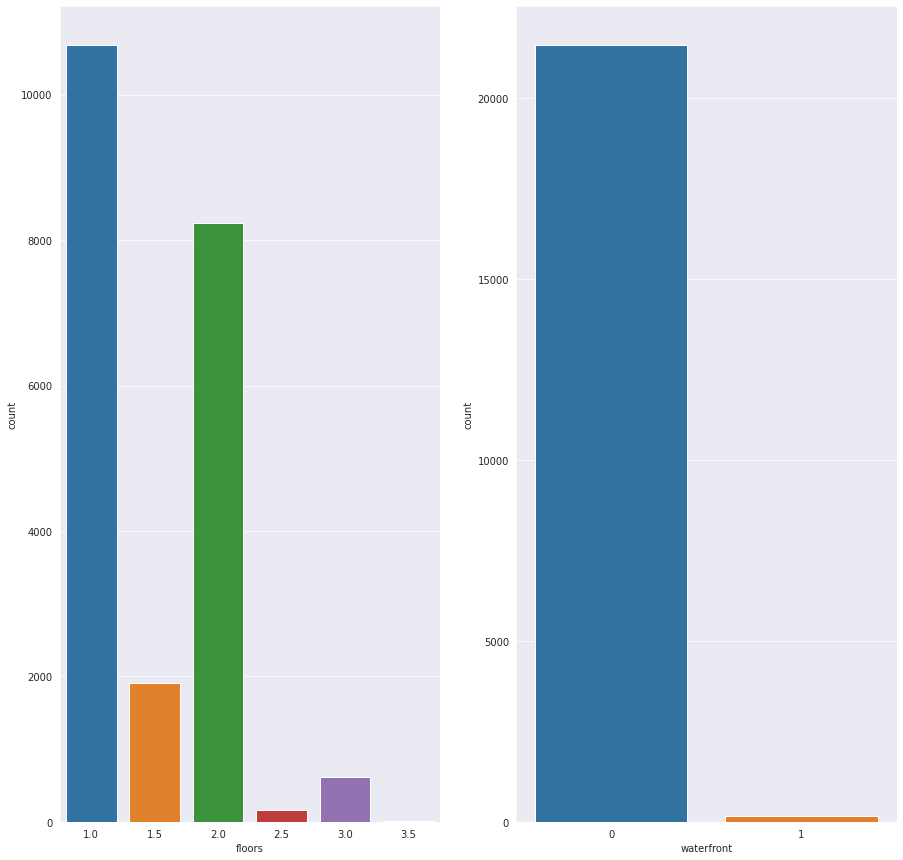

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))
sns.countplot(House_df['floors'], ax=ax[0])
sns.countplot(House_df['waterfront'], ax=ax[1])
fig.show()

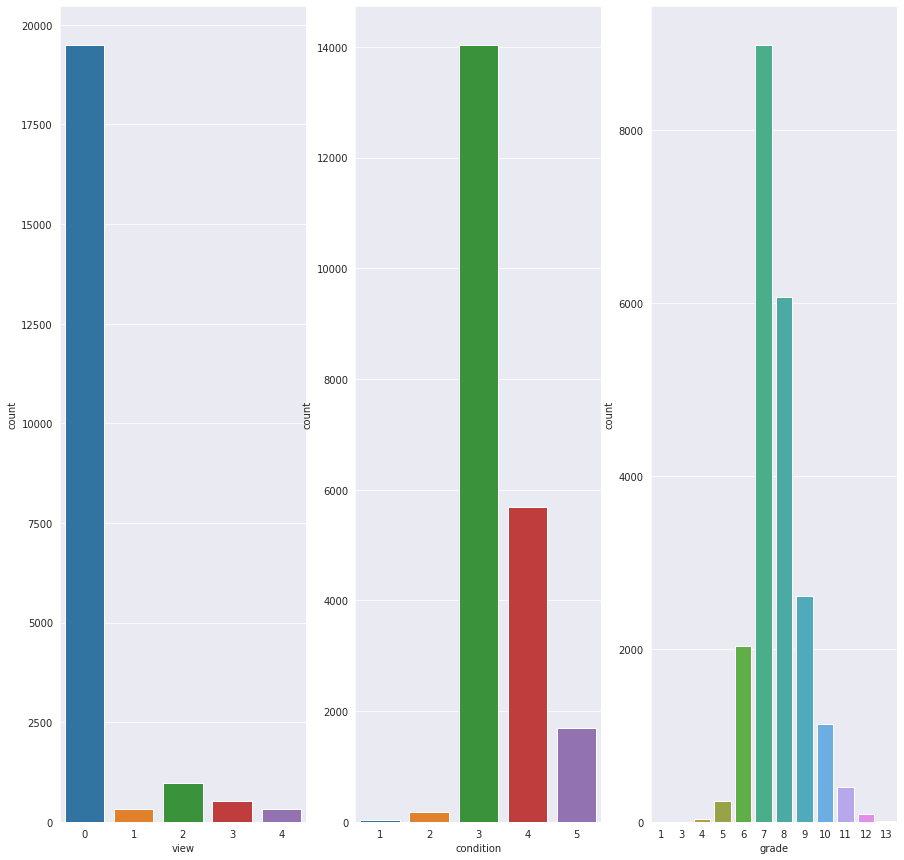

In [33]:
fig, ax = plt.subplots(1,3, figsize=(15, 15))
sns.countplot(House_df['view'], ax=ax[0])
sns.countplot(House_df['condition'], ax=ax[1])
sns.countplot(House_df['grade'], ax=ax[2])
fig.show()

The analysis shows how the variables are distributed along with various statistical measures. 

# b) Bivariate Analysis

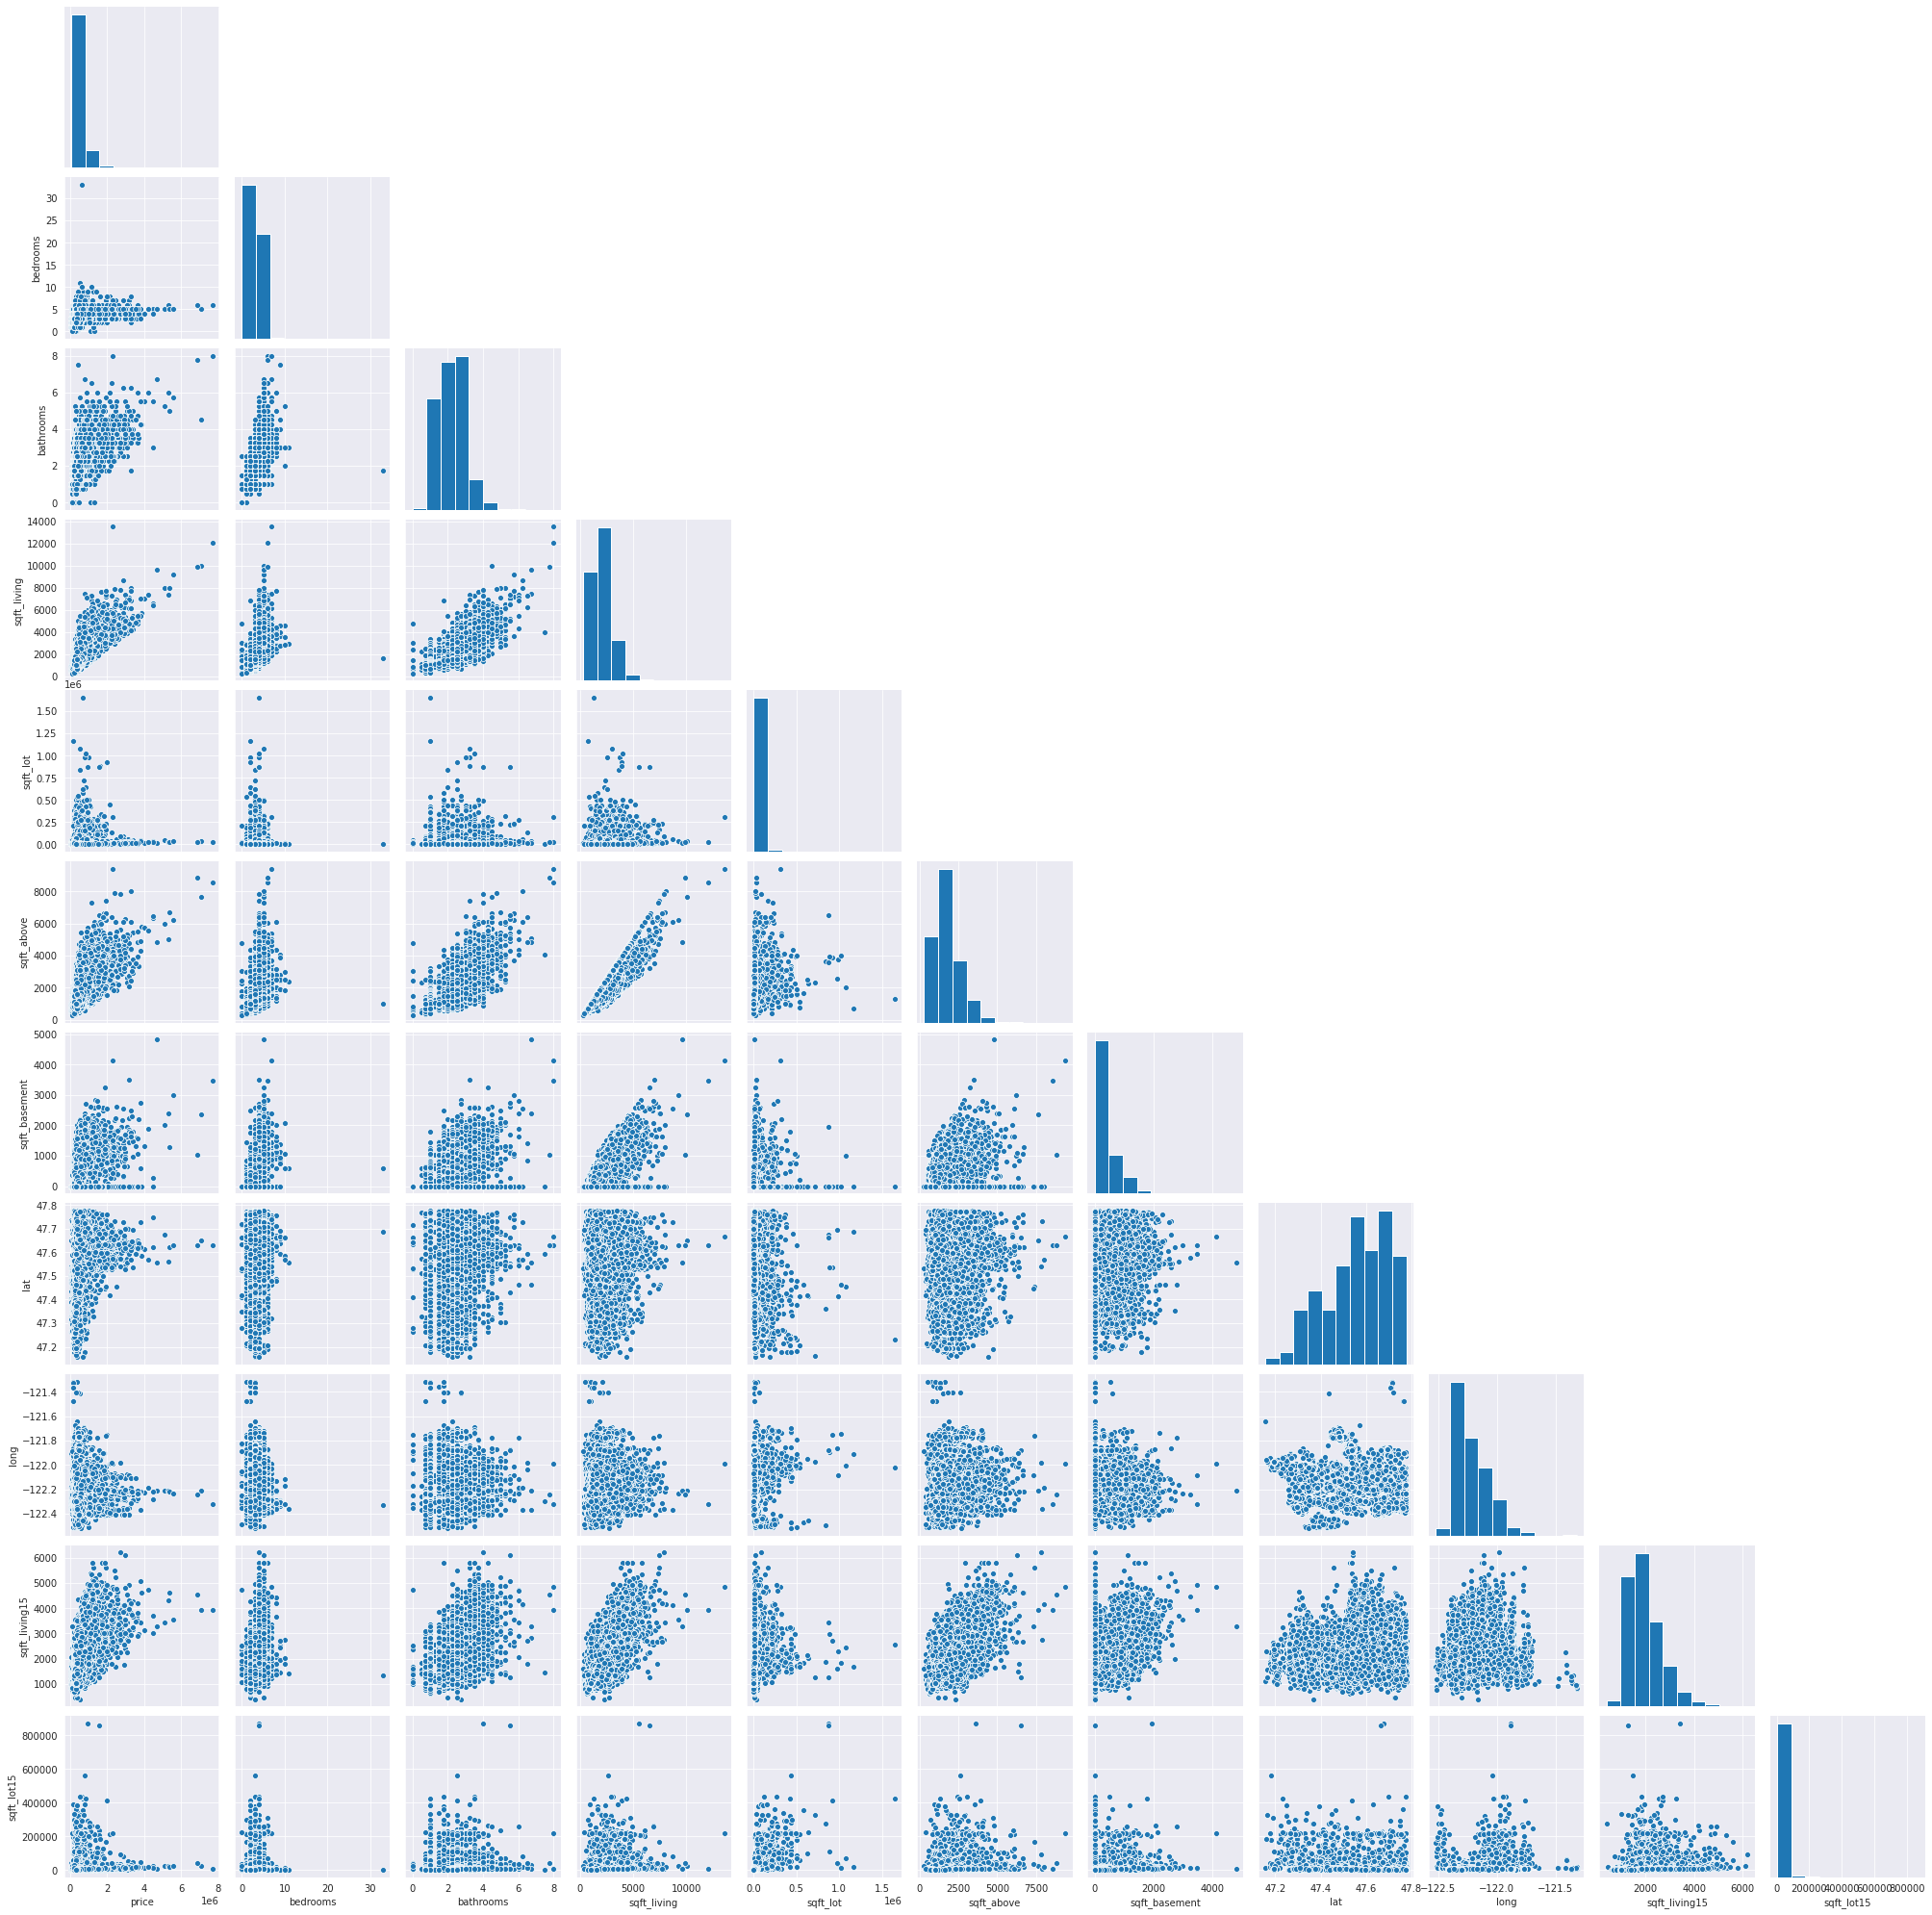

In [34]:
Num_df = House_df.drop(['floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built','yr_renovated', 'zipcode'], axis = 1)
sns.pairplot(Num_df, corner=True)

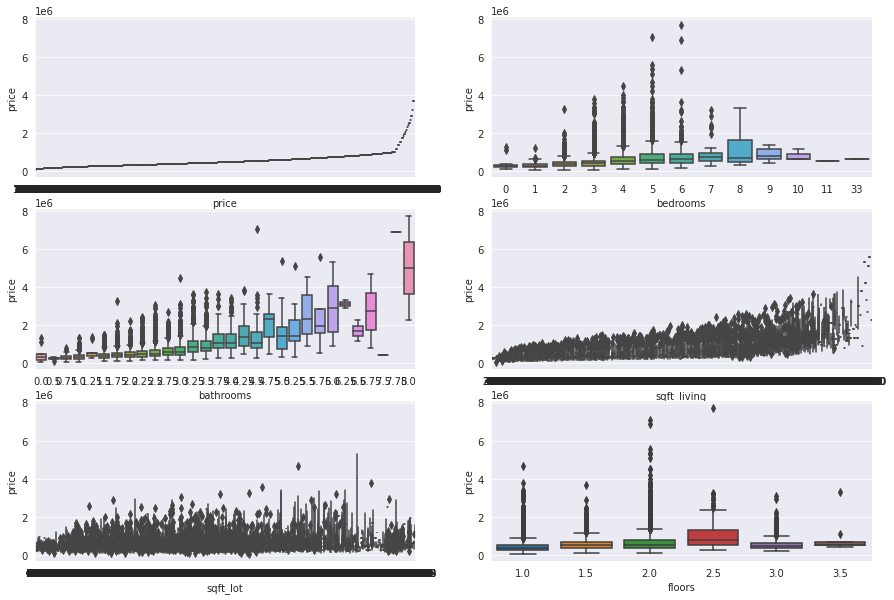

In [35]:
Cat_df = House_df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'zipcode'], axis = 1)

fig, ax = plt.subplots(3, 2, figsize=(15, 10))

for var, subplot in zip(Cat_df, ax.flatten()):
    sns.boxplot(x=var, y='price', data=House_df, ax=subplot)

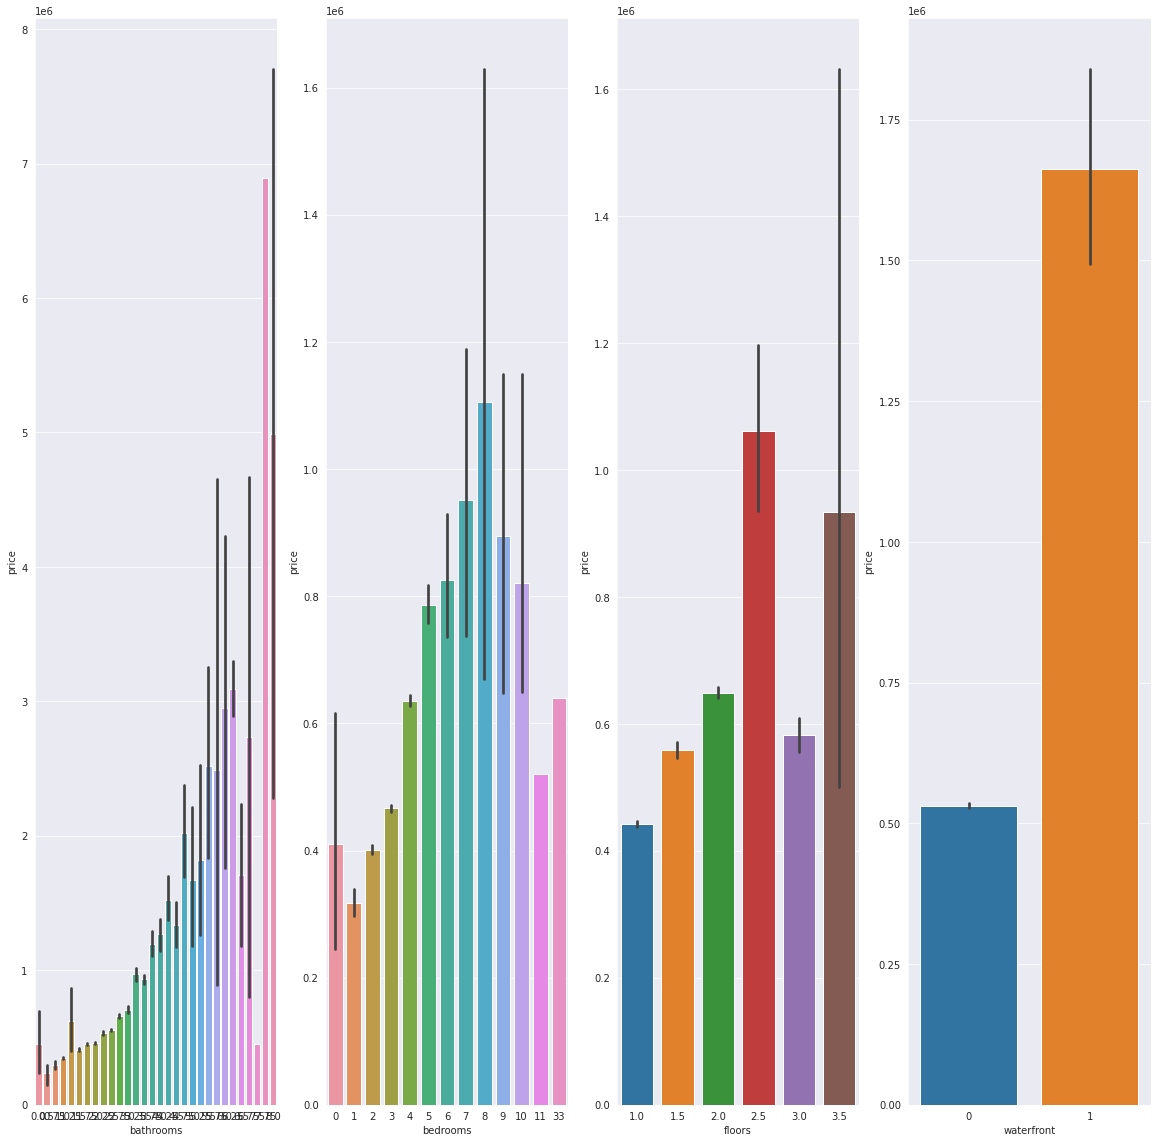

In [36]:
fig, ax = plt.subplots(1,4, figsize=(20, 20))
sns.barplot(x= 'bathrooms', y = 'price', data = House_df, ax=ax[0])
sns.barplot(x= 'bedrooms', y = 'price', data = House_df, ax=ax[1])
sns.barplot(x= 'floors', y = 'price', data = House_df, ax=ax[2])
sns.barplot(x= 'waterfront', y = 'price', data = House_df, ax=ax[3])
fig.show()

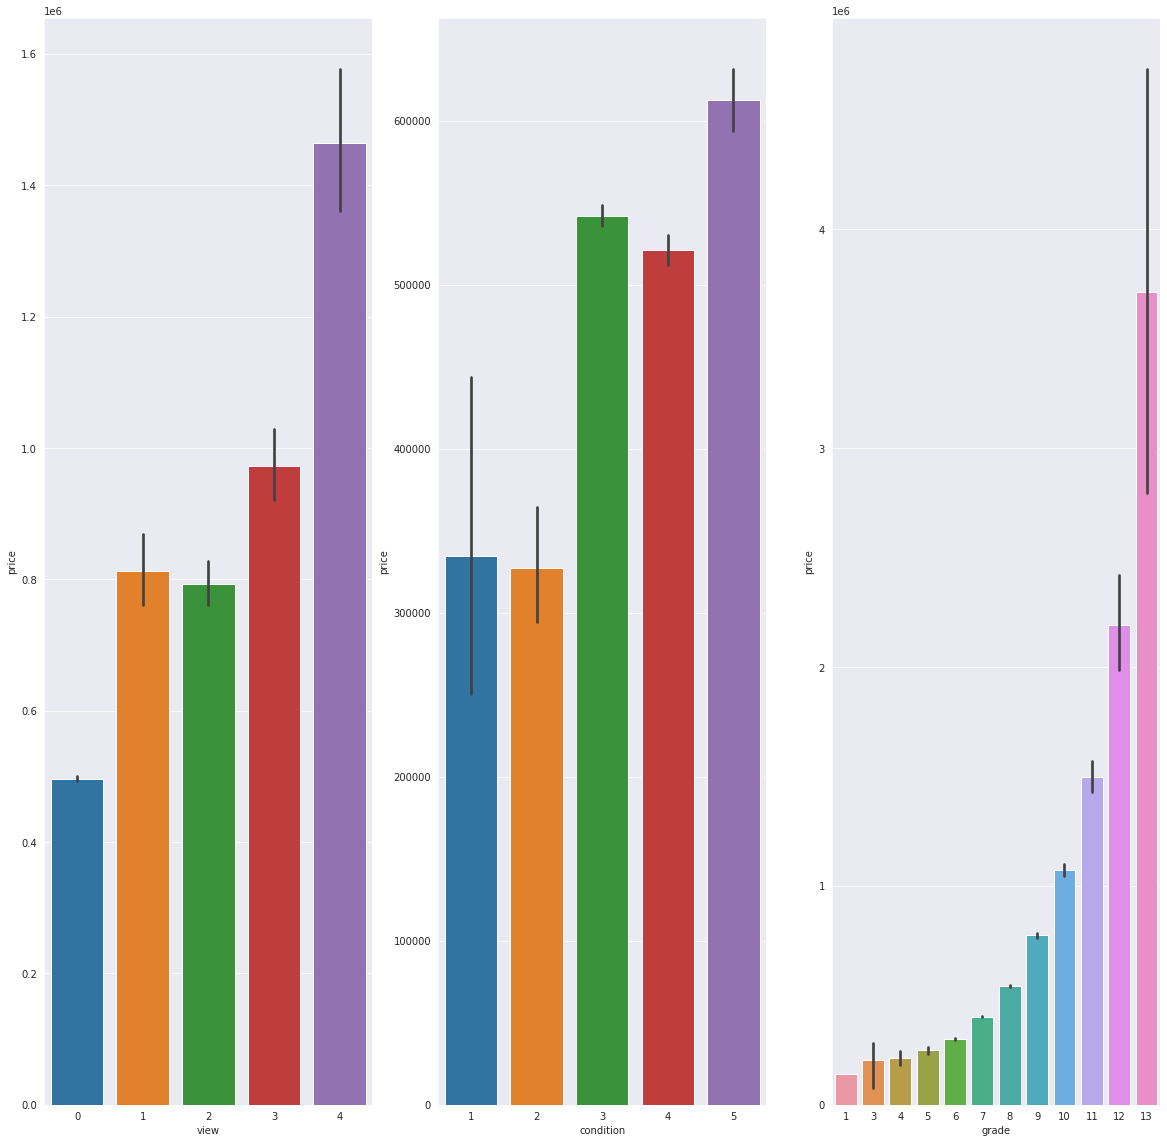

In [37]:
fig, ax = plt.subplots(1,3, figsize=(20, 20))
sns.barplot(x= 'view', y = 'price', data = House_df, ax=ax[0])
sns.barplot(x= 'condition', y = 'price', data = House_df, ax=ax[1])
sns.barplot(x= 'grade', y = 'price', data = House_df, ax=ax[2])
fig.show()

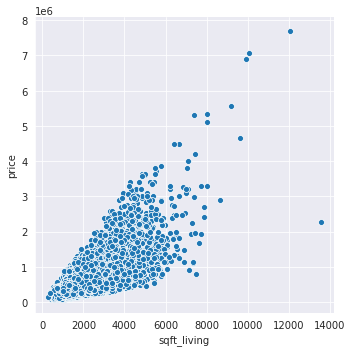

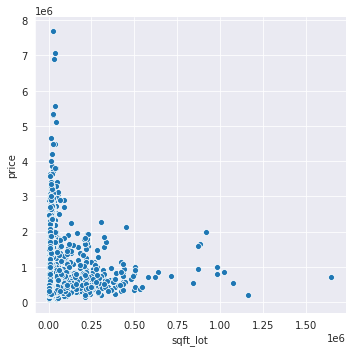

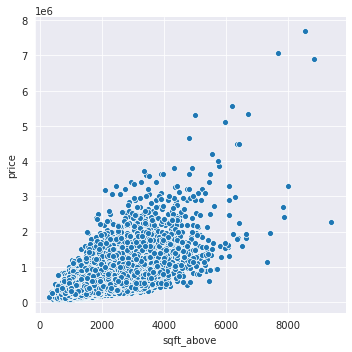

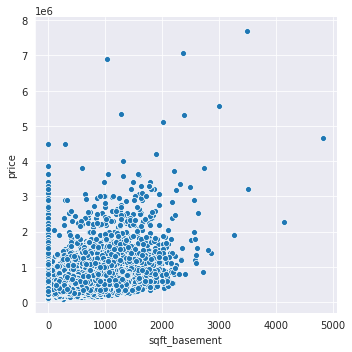

In [38]:
sns.relplot(x="sqft_living", y="price", data=House_df)
sns.relplot(x="sqft_lot", y="price", data=House_df)
sns.relplot(x="sqft_above", y="price", data=House_df)
sns.relplot(x="sqft_basement", y="price", data=House_df)

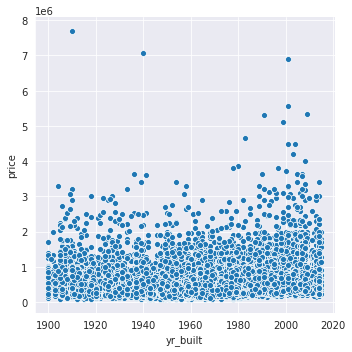

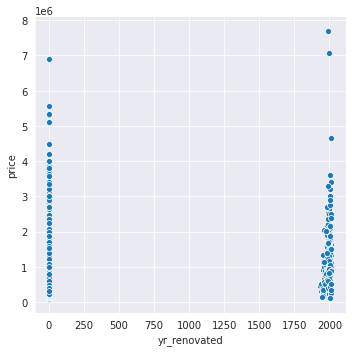

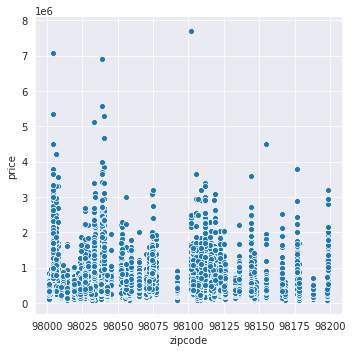

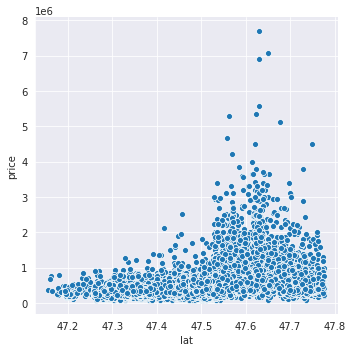

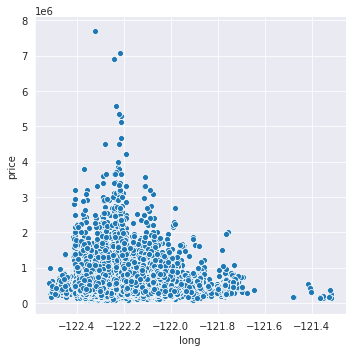

In [39]:
sns.relplot(x="yr_built", y="price", data=House_df)
sns.relplot(x="yr_renovated", y="price", data=House_df)
sns.relplot(x="zipcode", y="price", data=House_df)
sns.relplot(x="lat", y="price", data=House_df)
sns.relplot(x="long", y="price", data=House_df)

In [40]:
Corr = House_df.corr()
Corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


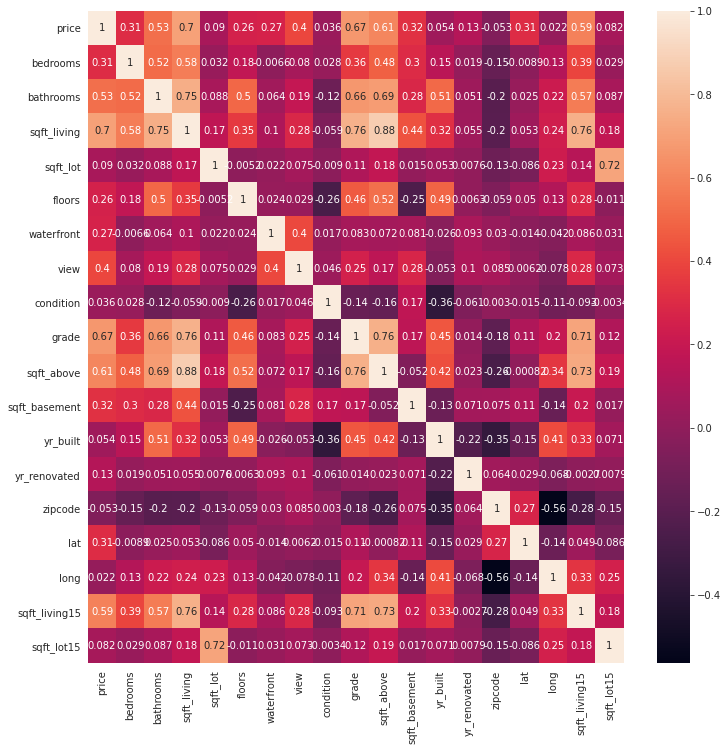

In [41]:
plt.figure(figsize=(12, 12))  
sns.heatmap(Corr, annot = True)

The analysis shows how the different variables are related with price, with depictions of how movements in features affect price. 

# c) Multivariate Analysis

In [42]:
House_df['floors'] = House_df['floors'].astype("int")
House_df['view'] = House_df['view'].astype("int")
House_df['waterfront'] = House_df['waterfront'].astype("int") 
House_df['condition'] = House_df['condition'].astype("int")
House_df['grade'] = House_df['grade'].astype("int")
House_df['yr_built'] = House_df['yr_built'].astype("int")
House_df['yr_renovated'] = House_df['yr_renovated'].astype("int")
House_df['zipcode'] = House_df['zipcode'].astype("int")
House_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [43]:
X = House_df.drop('price', axis=1)
y= House_df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Lda = LDA(n_components = 1)
X_train = Lda.fit_transform(X_train, y_train)
X_test = Lda.transform(X_test)

factors = pd.DataFrame (index= X.columns.values, data=Lda.coef_[0].T)
factors.sort_values(0, ascending=False)

,0
yr_built,4.138302
long,2.827805
sqft_living,1.754817
sqft_basement,1.052034
floors,0.983156
sqft_lot15,0.821479
zipcode,0.697048
sqft_above,0.695520
yr_renovated,-0.193909
view,-0.588045


The multivariate analysis reveals the coeffecients of the equation in descending order of contribution. 

# **Implementing the Solution**

The objective of this study is to predict the prices of houses based on the available information. To do this, the following models will be implemented with an reviwe of how each has performed:

 - Multiple Linear Regression
 - Quantile Regression
 - Ridge Regression
 - Lasso Regression
 - Elastic Net Regression

# a) Multiple Linear Regression

In [44]:
Data = House_df.drop('price', axis=1)
Corrs = Data.corr()
Corrs

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.519019,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.155643,0.519019,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.578619,-0.007775,-0.096743,0.029567,0.159001,0.296561,-0.013252
waterfront,-0.006582,0.063744,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.517913,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


In [45]:
pd.DataFrame(np.linalg.inv(Corrs.values), index=Corrs.index, columns=Corrs.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.656704,-0.480397,-1.304974e-01,0.050875,0.113971,0.063318,0.112715,-0.048148,0.301141,-7.752904e-01,-4.019555e-01,0.105120,0.041153,0.076102,0.047081,0.022804,0.030148,0.088387
bathrooms,-0.480397,3.343921,-5.365435e+00,-0.025039,-0.697294,0.008277,-0.040595,-0.136507,-0.274437,3.539697e+00,1.524997e+00,-0.844831,-0.248338,0.034834,-0.041809,0.051217,0.112212,0.066590
sqft_living,-0.130602,-5.370160,-3.387473e+13,-0.100582,1.501614,0.453698,-0.616082,-0.324466,-0.876240,3.054236e+13,1.632343e+13,1.246580,0.002449,-0.210488,-0.034302,-0.038938,-0.909287,-0.141121
sqft_lot,0.050875,-0.025039,-9.859067e-02,2.102683,0.051109,0.027408,-0.059160,0.030711,-0.053864,-1.096142e-01,5.169853e-03,0.091087,0.020435,-0.002458,0.053160,-0.132610,0.163043,-1.458808
floors,0.113971,-0.697294,1.499491e+00,0.051109,2.213675,-0.000916,-0.046610,0.093892,-0.225489,-1.806640e+00,-1.179898e-01,-0.801613,-0.122193,-0.159803,-0.133256,0.183779,0.226652,0.092894
waterfront,0.063318,0.008277,4.537295e-01,0.027408,-0.000916,1.203753,-0.492633,-0.012474,0.048727,-5.222220e-01,-2.209409e-01,-0.021982,-0.065564,0.022169,0.009616,0.027792,0.055073,-0.018318
view,0.112715,-0.040595,-6.178799e-01,-0.059160,-0.046610,-0.492633,1.435321,-0.021641,-0.185150,5.956236e-01,4.076253e-02,0.158776,-0.039291,-0.140763,0.118715,0.070952,-0.324882,-0.007982
condition,-0.048148,-0.136507,-3.246746e-01,0.030711,0.093892,-0.012474,-0.021641,1.249461,-0.053729,3.513432e-01,5.700364e-02,0.549009,0.205082,0.162102,0.063711,-0.006546,0.073324,-0.027553
grade,0.301141,-0.274437,-8.808857e-01,-0.053864,-0.225489,0.048727,-0.185150,-0.053729,3.413526,-8.265609e-01,-5.260558e-02,-0.612573,-0.068224,0.080004,-0.331941,0.393940,-0.903409,0.070748
sqft_above,-0.768326,3.542470,3.054236e+13,-0.107817,-1.808047,-0.522298,0.594407,0.351324,-0.831262,-2.753782e+13,-1.471765e+13,-0.560197,0.001731,0.104043,0.207343,-0.303152,-0.694039,-0.049328


We shall examine how the numbers change when variables with a VIF score exceeding 5 are dropped. 

In [46]:
Data1 = House_df.drop(['price', 'sqft_living', 'sqft_above', 'sqft_basement'], axis=1)
Corrs1 = Data1.corr()
Corrs1

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.087740,0.519019,0.063744,0.187737,-0.124982,0.664983,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_lot,0.031703,0.087740,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.155643,0.519019,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.578619,-0.007775,-0.096743,0.029567,0.159001,0.296561,-0.013252
waterfront,-0.006582,0.063744,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.187737,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.124982,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
yr_built,0.154178,0.506019,0.053080,0.578619,-0.026161,-0.053440,-0.361417,0.446963,1.000000,-0.224874,-0.346869,-0.148122,0.409356,0.326229,0.070958
yr_renovated,0.018841,0.050739,0.007644,-0.007775,0.092885,0.103917,-0.060618,0.014414,-0.224874,1.000000,0.064357,0.029398,-0.068372,-0.002673,0.007854


In [47]:
pd.DataFrame(np.linalg.inv(Corrs1.values), index=Corrs1.index, columns=Corrs1.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.465783,-0.812136,0.016696,0.132233,0.046836,0.082954,-0.053422,0.004080,0.209501,0.038596,0.053863,0.061463,-0.005150,-0.253703,0.055421
bathrooms,-0.812136,2.693299,-0.072111,-0.499109,-0.009015,-0.146995,-0.171385,-0.715667,-0.687958,-0.257666,-0.009207,-0.050694,0.067051,-0.320309,0.016586
sqft_lot,0.016696,-0.072111,2.094520,0.026747,0.022574,-0.055410,0.034036,-0.119484,0.113840,0.020788,-0.005543,0.061358,-0.148306,0.102153,-1.465918
floors,0.132233,-0.499109,0.026747,1.838513,-0.024795,0.078921,0.152083,-0.365186,-0.756642,-0.110992,-0.145565,-0.058640,0.041965,0.117648,0.079720
waterfront,0.046836,-0.009015,0.022574,-0.024795,1.200594,-0.486839,-0.008997,0.011622,-0.009225,-0.065038,0.021075,0.016038,0.015530,0.021287,-0.022277
view,0.082954,-0.146995,-0.055410,0.078921,-0.486839,1.390374,-0.041416,-0.176225,0.156992,-0.043289,-0.148208,0.095990,0.114065,-0.324397,-0.007756
condition,-0.053422,-0.171385,0.034036,0.152083,-0.008997,-0.041416,1.240404,-0.035964,0.543403,0.203319,0.159616,0.052368,0.015003,0.086517,-0.025941
grade,0.004080,-0.715667,-0.119484,-0.365186,0.011622,-0.176225,-0.035964,2.875633,-0.425421,-0.067272,0.050853,-0.275353,0.285396,-1.406362,0.012103
yr_built,0.209501,-0.687958,0.113840,-0.756642,-0.009225,0.156992,0.543403,-0.425421,2.540547,0.558669,0.284241,0.309084,-0.496372,0.236108,-0.029564
yr_renovated,0.038596,-0.257666,0.020788,-0.110992,-0.065038,-0.043289,0.203319,-0.067272,0.558669,1.153714,0.038174,0.046184,-0.054303,0.097794,-0.024411


In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = House_df.drop('price', axis=1).values
y = House_df['price'].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

linear = LinearRegression()
linear.fit(X_train, y_train)

linear_model = (mean_squared_error(y_test, linear.predict(X_test)))
print(linear_model)

36335585305.2921


The high MSE score indicates poor perfromance from the multiple linear regression approach which could be a result of multicollinear relationships or heteroscedatsicity. 
We shall use different features according to correlation and relevance. 

In [169]:
A = House_df[['bedrooms', 'sqft_lot', 'sqft_living', 'floors', 'waterfront', 'view', 'condition','grade', 
             'sqft_above', 'sqft_basement','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].values
b = House_df["price"].values.reshape(-1,1)


A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.2, random_state = 0)

# importing the Linear Regression
from sklearn.linear_model import LinearRegression


linear1 = LinearRegression()
linear1.fit(A_train, b_train)

Linear_model2 = (mean_squared_error(b_test, linear1.predict(A_test))) 
print(Linear_model2) 

38642849975.59667


In [171]:
Cols = House_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade', 
              'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

# 
coef_dict_baseline = {}
for coef, feat in zip(linear.coef_,Cols.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([-3.46246217e+04,  3.98416860e+04,  1.12552128e+02,  1.75585450e-01,
         6.03097546e+03,  6.05838054e+05,  5.28097787e+04,  2.61499762e+04,
         9.37947577e+04,  7.33319652e+01,  3.92201631e+01, -2.61773587e+03,
         2.00767167e+01, -5.65665113e+02,  6.05330320e+05, -2.22984977e+05,
         2.39509962e+01, -4.67905065e-01])}

In [170]:
y_pred = linear.predict(X_test)


residuals = np.subtract(y_pred, y_test)

print(pd.DataFrame(residuals).describe())
print(residuals.mean())

                  0
count  4.323000e+03
mean   4.675531e+03
std    1.905836e+05
min   -3.208965e+06
25%   -7.294742e+04
50%    1.265008e+04
75%    1.014825e+05
max    1.030487e+06
4675.531355361672


In [177]:
R1 = r2_score(y_test, y_pred)
R1

0.6948766798459348

Checking for Heteroscedasticity

In [149]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 122335.60951456291
Mean Squared Error: 36335585305.2921
Root Mean Squared Error: 190618.95316387637


<function matplotlib.pyplot.show>

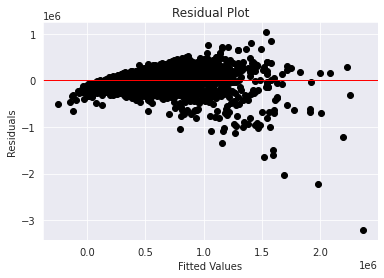

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals, color = 'black')
plt.title("Residual Plot")
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.axhline(y=residuals.mean(), color = 'red', linewidth = 1)
plt.show

In [53]:
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred.flatten(), residuals.flatten())
test_result, p_value

(860.0322879066837, 4.79226383774487e-189)

In [54]:
df = len(y_pred) - 1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, df)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


The second model perfroms arguably worse, as the score increases which could be attributed to fewer observations. Checking for heteroscedatsicity reveals different variances despite a result support homogenity. This suggests that a multiple linear regression model may not be suitable for the task. 

# b) Quantile Regression

In [155]:
S = House_df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade', 
              'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
              
t = House_df['price']

In [156]:
import statsmodels.formula.api as smf

quantile_model = smf.quantreg('t ~ S', House_df)
res = quantile_model.fit(q = 0.5)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      t   Pseudo R-squared:               0.4526
Model:                       QuantReg   Bandwidth:                   2.020e+04
Method:                 Least Squares   Sparsity:                    2.741e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21613
Time:                        08:01:28   Df Residuals:                    21597
                                        Df Model:                           15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -441.9774      3.591   -123.080      0.000    -449.016    -434.939
S[0]        -450.0699   1211.794     -0.371      0.710   -2825.276    1925.137
S[1]        6.306e+04   1984.987     31.770      0.000    5.92e+04     6.7e+04
S[2]           0.2930      0.033      9.005      0.0

In [157]:
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

 
for qt in quantiles: 
	res = quantile_model.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['S[0]']] + res.conf_int().loc['S[0]'].tolist())
 

params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt    intercept       x_coef  cf_lower_bound  cf_upper_bound
0  0.1  -242.482620  6332.716062     4119.830154     8545.601970
1  0.2  -507.635731  4351.835114     2173.193886     6530.476341
2  0.3  -309.162488  1640.226715     -572.498365     3852.951796
3  0.4  -141.351303 -2887.274542    -5173.029446     -601.519638
4  0.5  -441.977395  -450.069909    -2825.276341     1925.136523
5  0.6  -170.370524  2089.274797     -527.468542     4706.018136
6  0.7   -96.253184  2223.504516     -781.367525     5228.376557
7  0.8 -1699.047406  2134.915674    -1324.550788     5594.382136
8  0.9  -328.231778 -4352.396483   -11222.132620     2517.339654


In [163]:
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []


for qt in quantiles: 
	res = quantile_model.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['S[1]']] + res.conf_int().loc['S[1]'].tolist())

params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt    intercept        x_coef  cf_lower_bound  cf_upper_bound
0  0.1  -242.482620  38935.654325    35164.316731    42706.991920
1  0.2  -507.635731  48546.665183    44897.573743    52195.756624
2  0.3  -309.162488  55209.149751    51521.411462    58896.888040
3  0.4  -141.351303  62902.417795    59121.306354    66683.529236
4  0.5  -441.977395  63062.135578    59171.414329    66952.856826
5  0.6  -170.370524  66619.562583    62369.671990    70869.453176
6  0.7   -96.253184  73342.155153    68533.475324    78150.834982
7  0.8 -1699.047406  80232.785085    74213.975112    86251.595058
8  0.9  -328.231778  93343.841563    83046.701932   103640.981194


In [159]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = quantile_model.fit(q=q)
    return [q, res.params['Intercept'], res.params['S[2]']] + \
            res.conf_int().loc['S[2]'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('t ~ S', House_df).fit()
ols_ci = ols.conf_int().loc['S[2]'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['S[2]'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q           a         b        lb        ub
0  0.05 -248.842477  0.070491 -0.003859  0.144841
1  0.15 -195.153875  0.285836  0.218240  0.353432
2  0.25 -165.676287  0.243450  0.184807  0.302093
3  0.35   29.207794  0.236006  0.176074  0.295938
4  0.45 -291.135983  0.318439  0.253628  0.383249
5  0.55  179.275224  0.311287  0.243997  0.378576
6  0.65  136.103700  0.329365  0.261298  0.397433
7  0.75  141.550172  0.367299  0.289941  0.444656
8  0.85 -683.102617  0.533432  0.442507  0.624357
9  0.95 -432.287763  0.705917  0.524593  0.887242
{'a': 8085888.3068656055, 'b': 0.2706673157679163, 'lb': 0.17124357639396795, 'ub': 0.3700910551418647}


In [160]:
Q_pred = res.predict(S)

# To compare the actual output values for X_test with the predicted values

B1 = pd.DataFrame({'Actual': t, 'Predicted': Q_pred})
B1

,Actual,Predicted
0,221900.0,382333.990045
1,538000.0,819446.455574
2,180000.0,694461.697745
3,604000.0,644385.566099
4,510000.0,643872.331156
...,...,...
21608,360000.0,709377.502619
21609,400000.0,578799.920911
21610,402101.0,233195.171357
21611,400000.0,576118.547494


In [178]:
R2 = r2_score(t, Q_pred)
R2

0.29697762575446973

In [165]:
print('Mean Absolute Error:', metrics.mean_absolute_error(t, Q_pred))
print('Mean Squared Error:', metrics.mean_squared_error(t, Q_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(t, Q_pred)))

Mean Absolute Error: 237392.52017369607
Mean Squared Error: 94872001265.86473
Root Mean Squared Error: 308012.98879408435


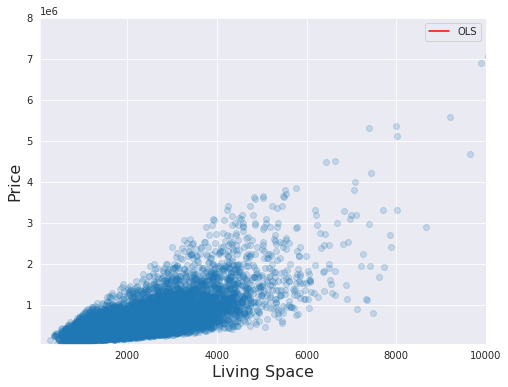

In [60]:
x = np.arange(House_df.sqft_living.min(), House_df.sqft_living.max(), 100)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(House_df.sqft_living, House_df.price, alpha=.2)
ax.set_xlim((50, 10000))
ax.set_ylim((50000, 8000000))
legend = ax.legend()
ax.set_xlabel('Living Space', fontsize=16)
ax.set_ylabel('Price', fontsize=16);

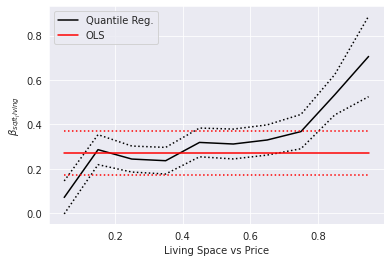

In [61]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{sqft_living}$')
plt.xlabel('Living Space vs Price')
plt.legend()
plt.show()

The model shows prediction across different price levels and could be significant in examining how much a house would fetch across different levels. Most values seem to fall within the OLS confidence interval range.   

# c) Ridge Regression

In [131]:
M = House_df.drop(['price'],axis=1)
n = House_df['price']

In [82]:
from sklearn.linear_model import Ridge

ridge = Ridge(normalize=True)
ridge.fit(M,n)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [132]:
from sklearn.model_selection import train_test_split

M_train,M_test,n_train,n_test = train_test_split(M,n,test_size=0.25,random_state=0)

In [85]:
from sklearn.linear_model import Ridge

Ridge_model = Ridge(normalize=True)
Ridge_model.fit(M_train, n_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [86]:
from sklearn.metrics import mean_squared_error
baseline_model = (np.sqrt(mean_squared_error(n, ridge.predict(M))))
baseline_model

223481.56477838478

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(M_train)
M = scaler.transform(M_train)

In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid = {'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [89]:
search.fit(M_train,n_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [90]:
search.best_params_

{'alpha': 0.001}

In [91]:
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(M_train,n_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [92]:
Ridge_pred = ridge.predict(M_test)

# To compare the actual output values for X_test with the predicted values

C2 = pd.DataFrame({'Actual': n_test, 'Predicted': Ridge_pred})
C2

,Actual,Predicted
3834,349950.0,537983.228181
1348,450000.0,632371.175454
20366,635000.0,502729.053870
16617,355500.0,336012.723694
20925,246950.0,66122.389704
...,...,...
7148,738000.0,540164.801542
2747,726000.0,718889.212655
15565,560000.0,744363.028270
21238,299000.0,184442.499462


In [93]:
from sklearn.metrics import mean_squared_error
Ridge_model = (np.sqrt(mean_squared_error(n_test, ridge.predict(M_test))))
print("The RMSE of the ridge model is: ",Ridge_model)

The RMSE of the ridge model is:  202995.68925182158


In [179]:
R3 = ridge.score(M_test,n_test) 
R3

0.7097403846620366

Checking for Heteroscedasticity

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(n_test, Ridge_pred))
print('Mean Squared Error:', metrics.mean_squared_error(n_test, Ridge_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(n_test, Ridge_pred)))

Mean Absolute Error: 124712.92450689073
Mean Squared Error: 41207249854.82211
Root Mean Squared Error: 202995.68925182158


In [133]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,M.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 36812.86065594354,
 'bedrooms': -36752.617959007686,
 'condition': 29076.68165410786,
 'floors': 9525.196705805492,
 'grade': 96169.57721809525,
 'lat': 602797.1900019618,
 'long': -217531.2413502074,
 'sqft_above': 92.13614155889827,
 'sqft_basement': 58.55579847474448,
 'sqft_living': 88.96081834749666,
 'sqft_living15': 24.337778474552053,
 'sqft_lot': 0.14174711814097524,
 'sqft_lot15': -0.3575739836559051,
 'view': 51796.33147257155,
 'waterfront': 553420.3560331737,
 'yr_built': -2630.020442833221,
 'yr_renovated': 17.57342090386977,
 'zipcode': -582.8248884814349}

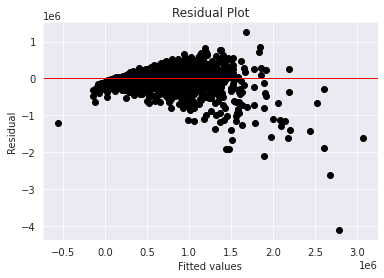

In [97]:
#checking for heteroscedatsicity

residuals = np.subtract(Ridge_pred, n_test)


plt.scatter(Ridge_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

In [98]:
test_result, p_value = sp.stats.bartlett(Ridge_pred, residuals)

df = len(Ridge_pred)-1
prob = 1 - p_value

crit_val = sp.stats.chi2.ppf(prob, df)
print(crit_val)

if (test_result > crit_val):
  print("The variances are unequal and model should be re-evaluated")
else:
  print("The variances are homogenous")

inf
The variances are homogenous


The model has a significantly better score than the previous two, but still fails to meet a staisfactory level of accuracy when predicting the housing prices. 

# d) Lasso Regression

In [134]:
C = House_df.drop(['price'],axis=1)
d = House_df['price']

In [101]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lasso = linear_model.Lasso()

In [102]:
lasso.fit(C,d)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
#baseline model
from sklearn.metrics import mean_squared_error

print('lasso RMSE: ', np.sqrt(mean_squared_error(d, lasso.predict(C))))

lasso RMSE:  201300.58508415034


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [135]:
from sklearn.model_selection import train_test_split

C_train,C_test,d_train,d_test = train_test_split(C,d,test_size=0.25,random_state=0)

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(C_train)
C = scaler.transform(C_train)

In [107]:
parameters = {'alpha':np.concatenate((np.arange(0.1,2,0.1),np.arange(2,5,0.5),np.arange(5,30,1)))}

In [108]:
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso,parameters,scoring='r2',n_jobs=1,refit=True,cv=30)

In [109]:
gridlasso.fit(C_train,d_train)

GridSearchCV(cv=30, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. , 25. , 26. , 27. , 28. , 29. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [110]:
print('Lasso Best Parameters: ',gridlasso.best_params_)

Lasso Best Parameters:  {'alpha': 29.0}


In [111]:
lasso = linear_model.Lasso(normalize=True,alpha=29.0)
lasso.fit(C_train,d_train)

Lasso(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
print('Lasso RMSE: ',np.sqrt(mean_squared_error(d_test,gridlasso.predict(C_test))))

Lasso RMSE:  203006.5457642138


In [180]:
R4 = lasso.score(C_test,d_test) 
R4

0.7075430086314884

In [114]:
Lasso_pred = lasso.predict(C_test)
Lasso_pred


D2 = pd.DataFrame({'Actual': np.round(d_test), 'Predicted': np.round(Lasso_pred)})
D2

,Actual,Predicted
3834,349950.0,518736.0
1348,450000.0,644494.0
20366,635000.0,521394.0
16617,355500.0,355903.0
20925,246950.0,85147.0
...,...,...
7148,738000.0,523059.0
2747,726000.0,736054.0
15565,560000.0,755048.0
21238,299000.0,201326.0


Checking for Heteroscedasticity

In [151]:
print('Mean Absolute Error:', metrics.mean_absolute_error(d_test, Lasso_pred))
print('Mean Squared Error:', metrics.mean_squared_error(d_test, Lasso_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(d_test, Lasso_pred)))

Mean Absolute Error: 123559.37696960461
Mean Squared Error: 41519204457.980965
Root Mean Squared Error: 203762.61791109026


In [136]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,C.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 36812.86065594354,
 'bedrooms': -36752.617959007686,
 'condition': 29076.68165410786,
 'floors': 9525.196705805492,
 'grade': 96169.57721809525,
 'lat': 602797.1900019618,
 'long': -217531.2413502074,
 'sqft_above': 92.13614155889827,
 'sqft_basement': 58.55579847474448,
 'sqft_living': 88.96081834749666,
 'sqft_living15': 24.337778474552053,
 'sqft_lot': 0.14174711814097524,
 'sqft_lot15': -0.3575739836559051,
 'view': 51796.33147257155,
 'waterfront': 553420.3560331737,
 'yr_built': -2630.020442833221,
 'yr_renovated': 17.57342090386977,
 'zipcode': -582.8248884814349}

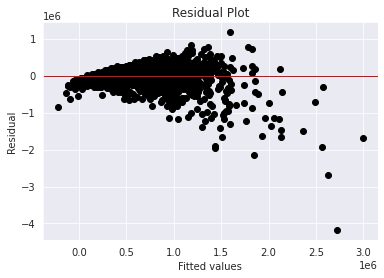

In [115]:
# Plotting the residual plot

residuals = np.subtract(Lasso_pred, d_test)

# Plotting the residual scatterplot

plt.scatter(Lasso_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

In [116]:
test_result, p_value = sp.stats.bartlett(Lasso_pred,residuals)

df1 = len(Lasso_pred)-1
prob1 = 1 - p_value

crit_val1 = sp.stats.chi2.ppf(prob1, df1)
print(crit_val1)


if (test_result > crit_val1):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


This analysis reveals an accuracy level similar to the Ridge Regression model where about 70% of the data was accurately fitted by the model. 

# e) Elastic Net Regression

In [182]:
K = House_df.drop('price', axis=1)
l = House_df['price']

In [183]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(normalize=True)
elastic.fit(K,l)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [148]:
#Baseline
print('Elastic Net RMSE: ' ,np.sqrt(mean_squared_error(l, elastic.predict(K))))

Elastic Net RMSE:  367267.4327649003


In [139]:
K_train, K_test, l_train, l_test = train_test_split(K,l, test_size=0.25,random_state=0)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(K_train)
K = scaler.transform(K_train)

In [184]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[0.2,0.4,0.6,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [185]:
search.fit(K_train,l_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [186]:
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [187]:
elastic = ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.8)
elastic.fit(K_train,l_train)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [188]:
print("Elastic Net RMSE:" ,np.sqrt(mean_squared_error(l_test,elastic.predict(K_test))))

Elastic Net RMSE: 215074.8172172816


In [189]:
R5 = elastic.score(K_test,l_test)
R5

0.6741849500890253

In [128]:
ELN_pred = elastic.predict(K_test)

# To compare the actual output values for X_test with the predicted values

K2 = pd.DataFrame({'Actual': l_test, 'Predicted': ELN_pred})
K2

,Actual,Predicted
15431,1000000.0,960711.345651
12550,330000.0,593825.348383
11310,335000.0,190359.774998
5316,321027.0,595627.204857
15298,330490.0,324606.335192
...,...,...
15644,675000.0,644178.008363
9865,450000.0,588572.414605
16462,405000.0,292929.345701
9831,204950.0,228389.411732


Checking for Heteroscedasticity

In [143]:
print('Mean Absolute Error:', metrics.mean_absolute_error(l_test, ELN_pred))
print('Mean Squared Error:', metrics.mean_squared_error(l_test, ELN_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(l_test, ELN_pred)))

Mean Absolute Error: 126710.22217196014
Mean Squared Error: 46257177001.0471
Root Mean Squared Error: 215074.8172172816


In [140]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,K.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 36812.86065594354,
 'bedrooms': -36752.617959007686,
 'condition': 29076.68165410786,
 'floors': 9525.196705805492,
 'grade': 96169.57721809525,
 'lat': 602797.1900019618,
 'long': -217531.2413502074,
 'sqft_above': 92.13614155889827,
 'sqft_basement': 58.55579847474448,
 'sqft_living': 88.96081834749666,
 'sqft_living15': 24.337778474552053,
 'sqft_lot': 0.14174711814097524,
 'sqft_lot15': -0.3575739836559051,
 'view': 51796.33147257155,
 'waterfront': 553420.3560331737,
 'yr_built': -2630.020442833221,
 'yr_renovated': 17.57342090386977,
 'zipcode': -582.8248884814349}

In [ ]:
residuals = np.subtract(ELN_pred, l_test)

# Plotting the residual scatterplot

plt.scatter(Lasso_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted Values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

In [ ]:
test_result, p_value = sp.stats.bartlett(ELN_pred,residuals)

df1 = len(Lasso_pred)-1
prob1 = 1 - p_value

crit_val1 = sp.stats.chi2.ppf(prob1, df1)
print(crit_val1)


if (test_result > crit_val1):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

## 8. Challenging the solution

From the solution, the multiple linear regression model performed the best, however this was achieved after dropping a significant number of columns from the analysis which may have led to loss of information. It also showed a lower r-score that Ridge and Lasso models. The Ridge and Laso displayed similar r-scores while Lasso displayed a lower RMSE. The ELN method however perfromed slightly worse than the two as it had a lower score of 67% compared to Lasso and Ridge at 70% and a higher RMSE score. 
Despite the quantile regression approach being suited to perfrom analysys with data displaying high levels of multicollinearity, it seems to have the worst score. 
The variables provided displayed high levels of collinearity which may have contributed to the perfromance of the models. 
It would be prudent to focus more on aspects such as location, number of bedrooms and general condition of the house relative to factors that focus more on aethetics in pricing the house. It seems that convenice, space and functionality contribute more to a house desirability than its appearance and features that embelish it. 







In [190]:
models = ['multi-linear', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [R1,R2,R3,R4,R5]
model_results = pd.DataFrame({'Regresion models': models, 'r2_scores': r2_scores})
model_results.sort_values(by = 'r2_scores',axis=0,ascending=False)

,Regresion models,r2_scores
2,ridge,0.709740
3,lasso,0.707543
0,multi-linear,0.694877
4,elastic,0.674185
1,quantile,0.296978


A cross validation was perfromed to see if a lower MSE score could be obtained and it was, making it the best possible model to outperform. 

In [154]:
# Reviewing the Solution 

X = House_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade', 
              'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].values
y = House_df["price"].values.reshape(-1,1)

# importing leave one out library
from sklearn.model_selection import LeaveOneOut

#
folds = LeaveOneOut()

#find out how many folds set up for using  get_n_splits
print('we are using ' + str (folds.get_n_splits(X)) + ' folds')

# create and assess five models based on the folds we have created

RMSES = []
count = 0
for train_index, test_index in folds.split(X):
  # set up train and test based on split determined by kfold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting a linear regression
  linear = LinearRegression()
  linear.fit(X_train, y_train)

# baseline_linear_model = (mean_squared_error(y_true = y_test, y_pred = linear.predict(X_test))) 
# print(baseline_linear_model)                     

  # making predictions
  y_pred = linear.predict(X_test)

  from sklearn import metrics
  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('trained '+str(count) + ' models')
print('--------------------------')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))

we are using 21613 folds
trained 21613 models
--------------------------
The mean of the RMSES is: 126238.70838045824


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

We had the right data however additional data on features such as distance to a town, ease of obtaining amenities and property taxes for example would have helped in a more comprehensive analysis. 

### b). Do we need other data to answer our question?

### c). Did we have the right question?

To perfrom a more comprehensive analysis additional data would be required. 

In [ ]:
It would also help to find a better metric to gauge location preference for the ease of computation and accuracy of prediction results. 